# Assignment - Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from IPython.display import Image  
from six import StringIO
#from imblearn.over_sampling import SMOTE

### Use Random Seed = 42

In [2]:
RANDOM_SEED = 42

## 1. Load the data

In [3]:
data = pd.read_csv(f'../dataset/raw/dataset.csv')

## 2. Perform the exploratory data analysis

### First 10 rows of the data

In [4]:
print("First 10 rows of the data:")
print(data.head(10))

First 10 rows of the data:
   EmployeeID  Attrition   Age TravelProfile Department  HomeToWork  \
0     5110001          0  35.0        Rarely  Analytics         5.0   
1     5110002          1  32.0           Yes      Sales         5.0   
2     5110003          0  31.0        Rarely  Analytics         5.0   
3     5110004          0  34.0           Yes      Sales        10.0   
4     5110005          0  37.0            No  Analytics        27.0   
5     5110006          1  34.0           Yes  Marketing        24.0   
6     5110007          0  35.0           Yes      Sales         1.0   
7     5110008          1  26.0        Rarely      Sales         8.0   
8     5110009          0  45.0           Yes  Analytics         5.0   
9     5110010          1  24.0        Rarely      Sales         4.0   

      EducationField  Gender  HourlnWeek  Involvement  ...  JobSatisfaction  \
0                 CA    Male        69.0            1  ...                1   
1         Statistics  Female     

### 5-point summary

In [5]:
print("\n5-point summary:")
print(data.describe())


5-point summary:
         EmployeeID    Attrition          Age   HomeToWork   HourlnWeek  \
count  5.180000e+03  5180.000000  4864.000000  4925.000000  4893.000000   
mean   5.112590e+06     0.278958    37.108553    11.107411    57.979767   
std    1.495482e+03     0.448530     9.248647     8.455577    12.996674   
min    5.110001e+06     0.000000    18.000000     1.000000    10.000000   
25%    5.111296e+06     0.000000    30.000000     5.000000    49.000000   
50%    5.112590e+06     0.000000    36.000000     9.000000    59.000000   
75%    5.113885e+06     1.000000    43.000000    16.000000    67.000000   
max    5.115180e+06     1.000000    61.000000   121.000000    99.000000   

       Involvement  WorkLifeBalance  JobSatisfaction        ESOPs  \
count  5180.000000      5180.000000      5180.000000  5180.000000   
mean      3.226641         3.012741         3.144402     0.490541   
std       0.872431         1.410602         1.342776     0.499959   
min       1.000000         1.0

### Information about the column (data types)

In [6]:
print("\nInformation about the columns:")
print(data.info())


Information about the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   int64  
 1   Attrition           5180 non-null   int64  
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   int64  
 10  WorkLifeBalance     5180 non-null   int64  
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   int64  
 13  ESOPs               5180 non-null   int64  
 14  NumCompaniesWorked  5180 non-null   int64  
 15  OverTime            518

### Number of outliers (using IQR method)

Number of outliers in the dataset: 1707


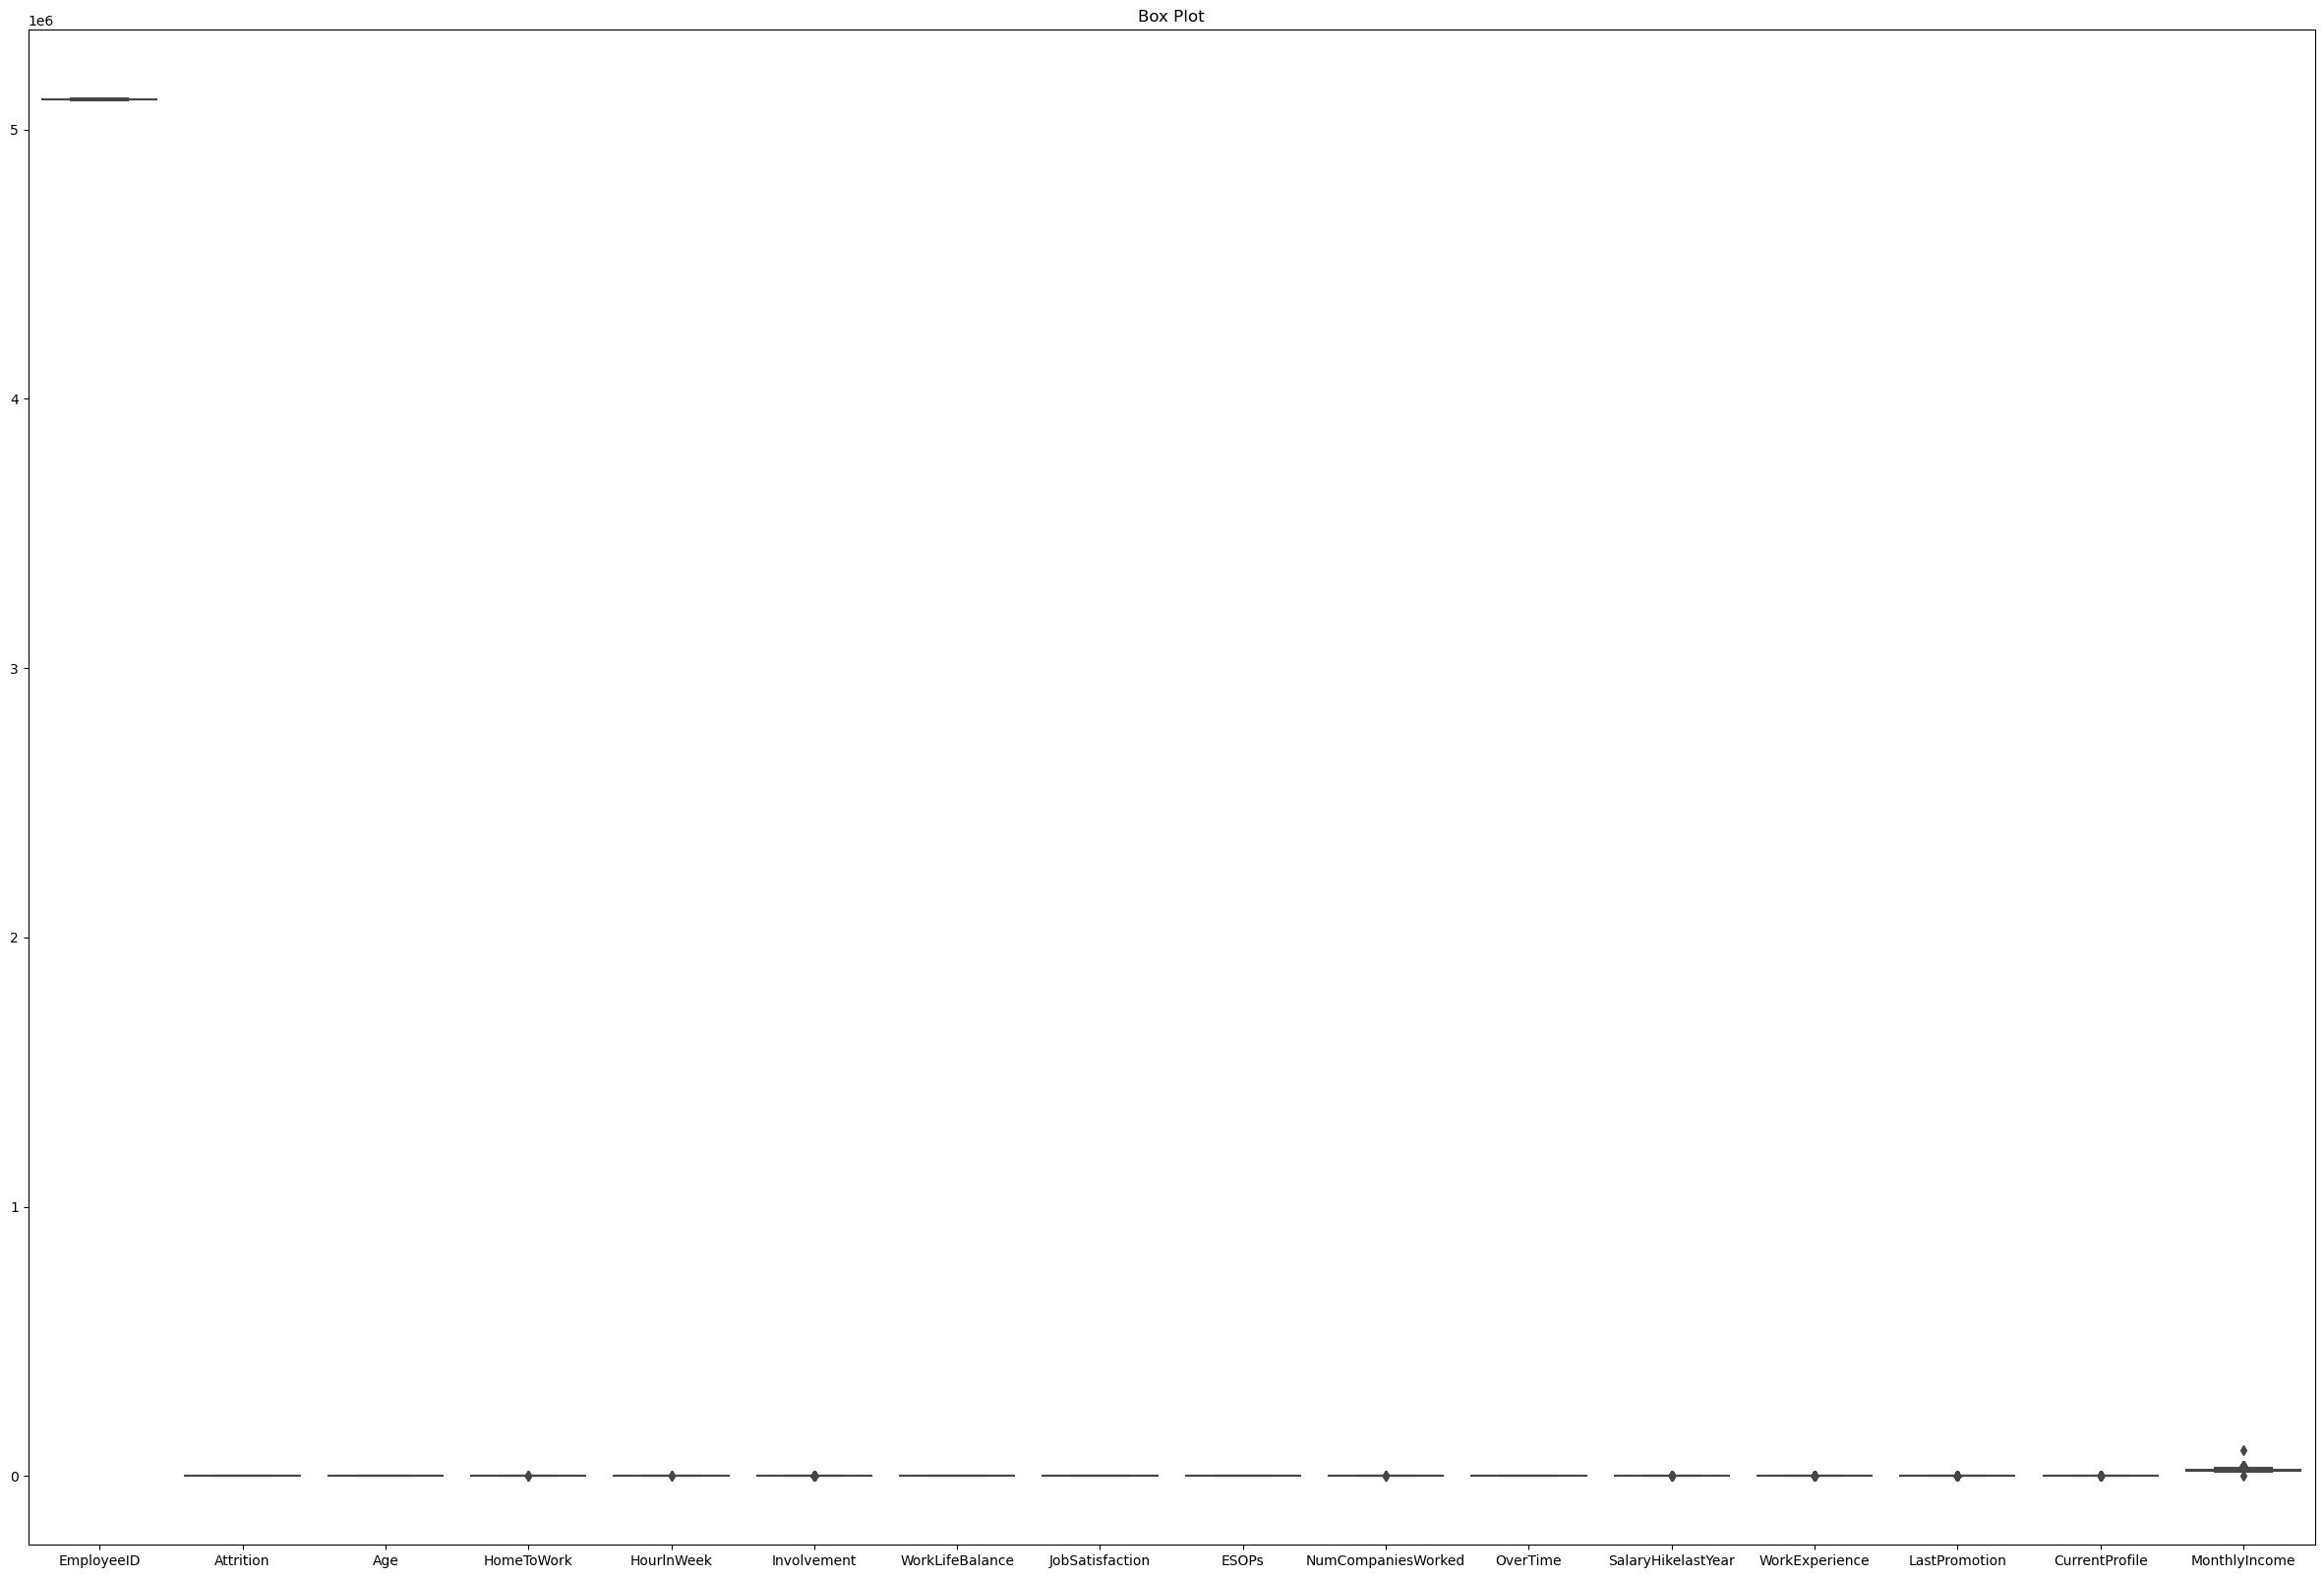

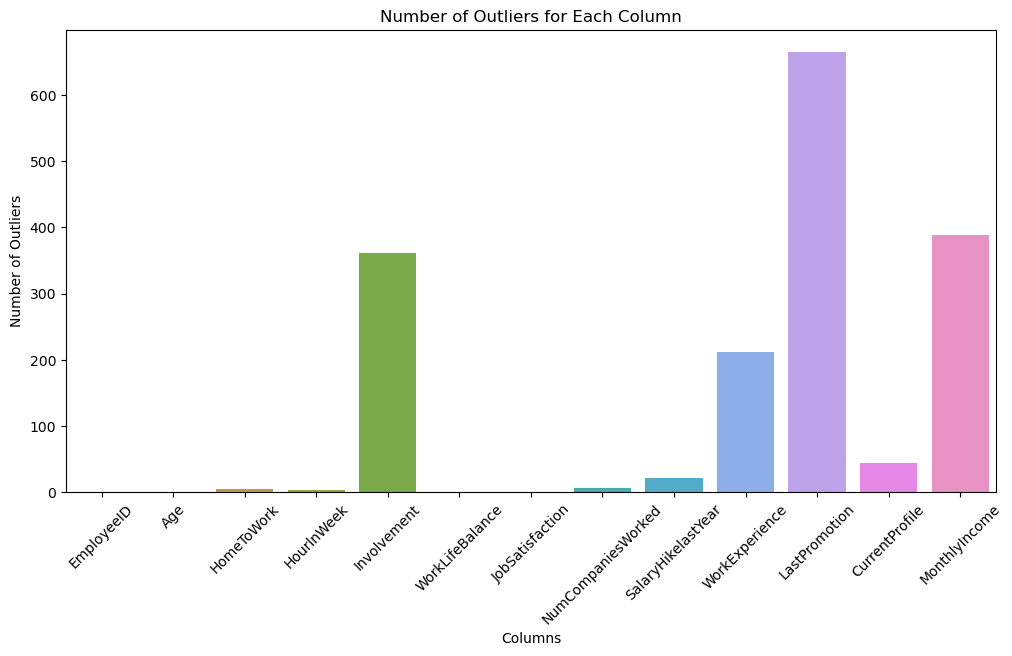

In [7]:
# Identify numeric columns, excluding binary columns
# When dealing with binary columns that have values 0 and 1, the typical methods for identifying outliers 
# (such as the IQR method) don't apply effectively. In these cases, outliers are generally not considered 
# because all values are valid representations of the data. Instead, we should focus on the numeric columns 
# where outliers can have a significant impact.
numeric_cols = [col for col in data.select_dtypes(include=[np.number]).columns if data[col].nunique() > 2]

# Calculate IQR for numerical columns
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
outliers_mask = ((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR)))

# Count number of outliers for each column
outliers_count = outliers_mask.sum()

# Calculate the number of outliers
num_outliers = outliers_mask.sum().sum()

print(f"Number of outliers in the dataset: {num_outliers}")

# Optional: Display the outliers
outliers = data[outliers_mask.any(axis=1)]

plt.figure(figsize=(30, 20))
sns.boxplot(data=data)
plt.title("Box Plot")
plt.show()

# Plot the number of outliers for each column
plt.figure(figsize=(12, 6))
sns.barplot(x=outliers_count.index, y=outliers_count.values)
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers for Each Column')
plt.show()

### Missing value


Number of missing values: 1896


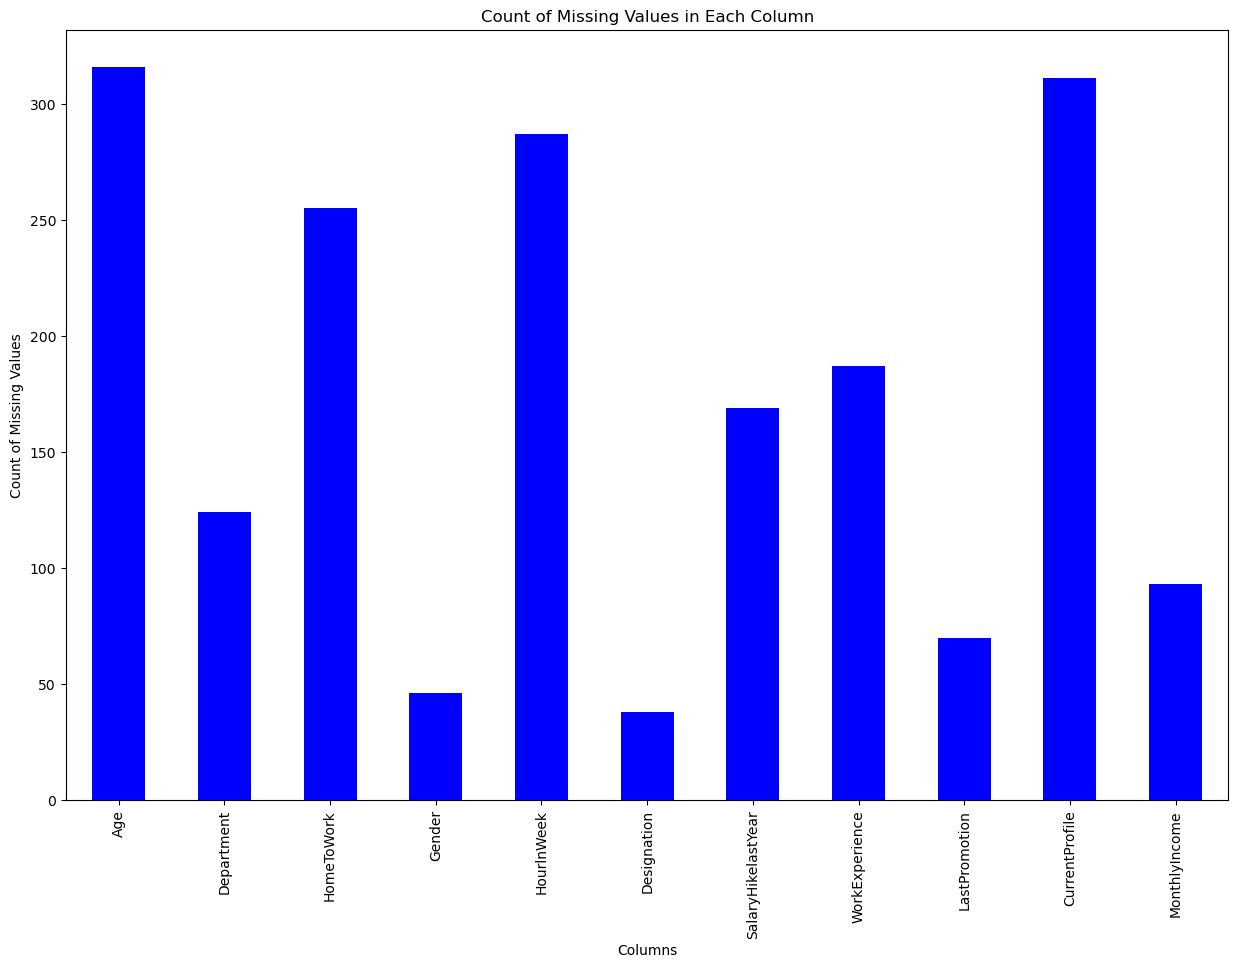

In [8]:
missing_values = data.isnull().sum().sum()
print(f"\nNumber of missing values: {missing_values}")

# Count of missing values in each column
missing_values_count = data.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]
plt.figure(figsize=(15, 10))
missing_values_count.plot(kind='bar', color='blue')
plt.title("Count of Missing Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.show()

### Correlation between variables


Correlation matrix:
                         Age  HomeToWork  HourlnWeek  SalaryHikelastYear  \
Age                 1.000000    0.005808   -0.008466            0.006962   
HomeToWork          0.005808    1.000000    0.061177            0.059038   
HourlnWeek         -0.008466    0.061177    1.000000            0.004509   
SalaryHikelastYear  0.006962    0.059038    0.004509            1.000000   
WorkExperience      0.681935    0.005730   -0.017155           -0.025278   
LastPromotion       0.240965    0.013660   -0.030324           -0.007047   
CurrentProfile      0.214335    0.008359    0.000099           -0.000609   
MonthlyIncome       0.490282   -0.011774   -0.020037           -0.040105   

                    WorkExperience  LastPromotion  CurrentProfile  \
Age                       0.681935       0.240965        0.214335   
HomeToWork                0.005730       0.013660        0.008359   
HourlnWeek               -0.017155      -0.030324        0.000099   
SalaryHikelastYear

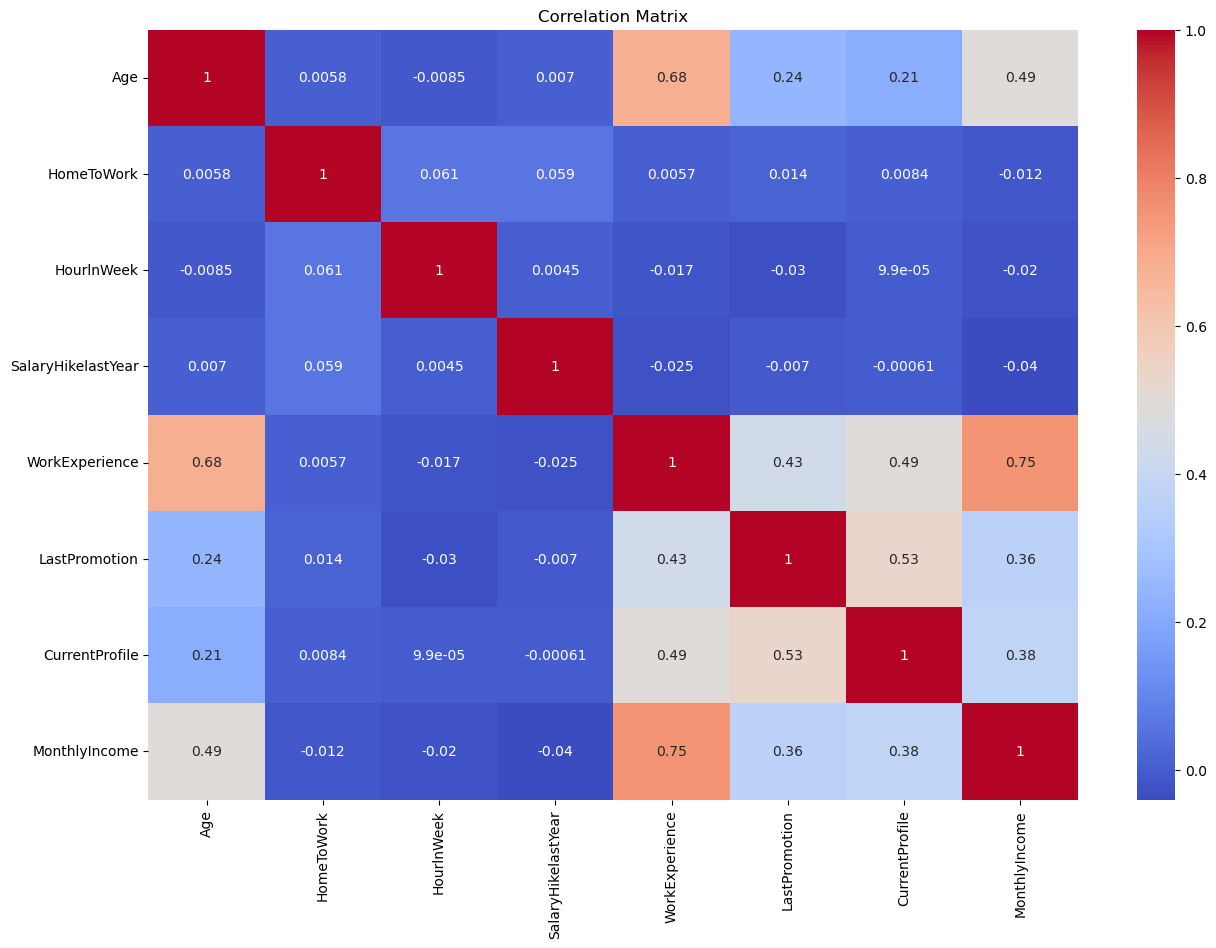

In [9]:
print("\nCorrelation matrix:")
# Convert float columns to numeric
numeric_data = data.select_dtypes(include=[np.float64]).apply(pd.to_numeric)

print(numeric_data.corr())

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Distribution of the data


Distribution of the data:
          EmployeeID    Attrition          Age TravelProfile Department  \
count   5.180000e+03  5180.000000  4864.000000          5180       5056   
unique           NaN          NaN          NaN             3          3   
top              NaN          NaN          NaN        Rarely  Analytics   
freq             NaN          NaN          NaN          3637       3219   
mean    5.112590e+06     0.278958    37.108553           NaN        NaN   
std     1.495482e+03     0.448530     9.248647           NaN        NaN   
min     5.110001e+06     0.000000    18.000000           NaN        NaN   
25%     5.111296e+06     0.000000    30.000000           NaN        NaN   
50%     5.112590e+06     0.000000    36.000000           NaN        NaN   
75%     5.113885e+06     1.000000    43.000000           NaN        NaN   
max     5.115180e+06     1.000000    61.000000           NaN        NaN   

         HomeToWork EducationField Gender   HourlnWeek  Involvement  ...

<Figure size 1500x1000 with 0 Axes>

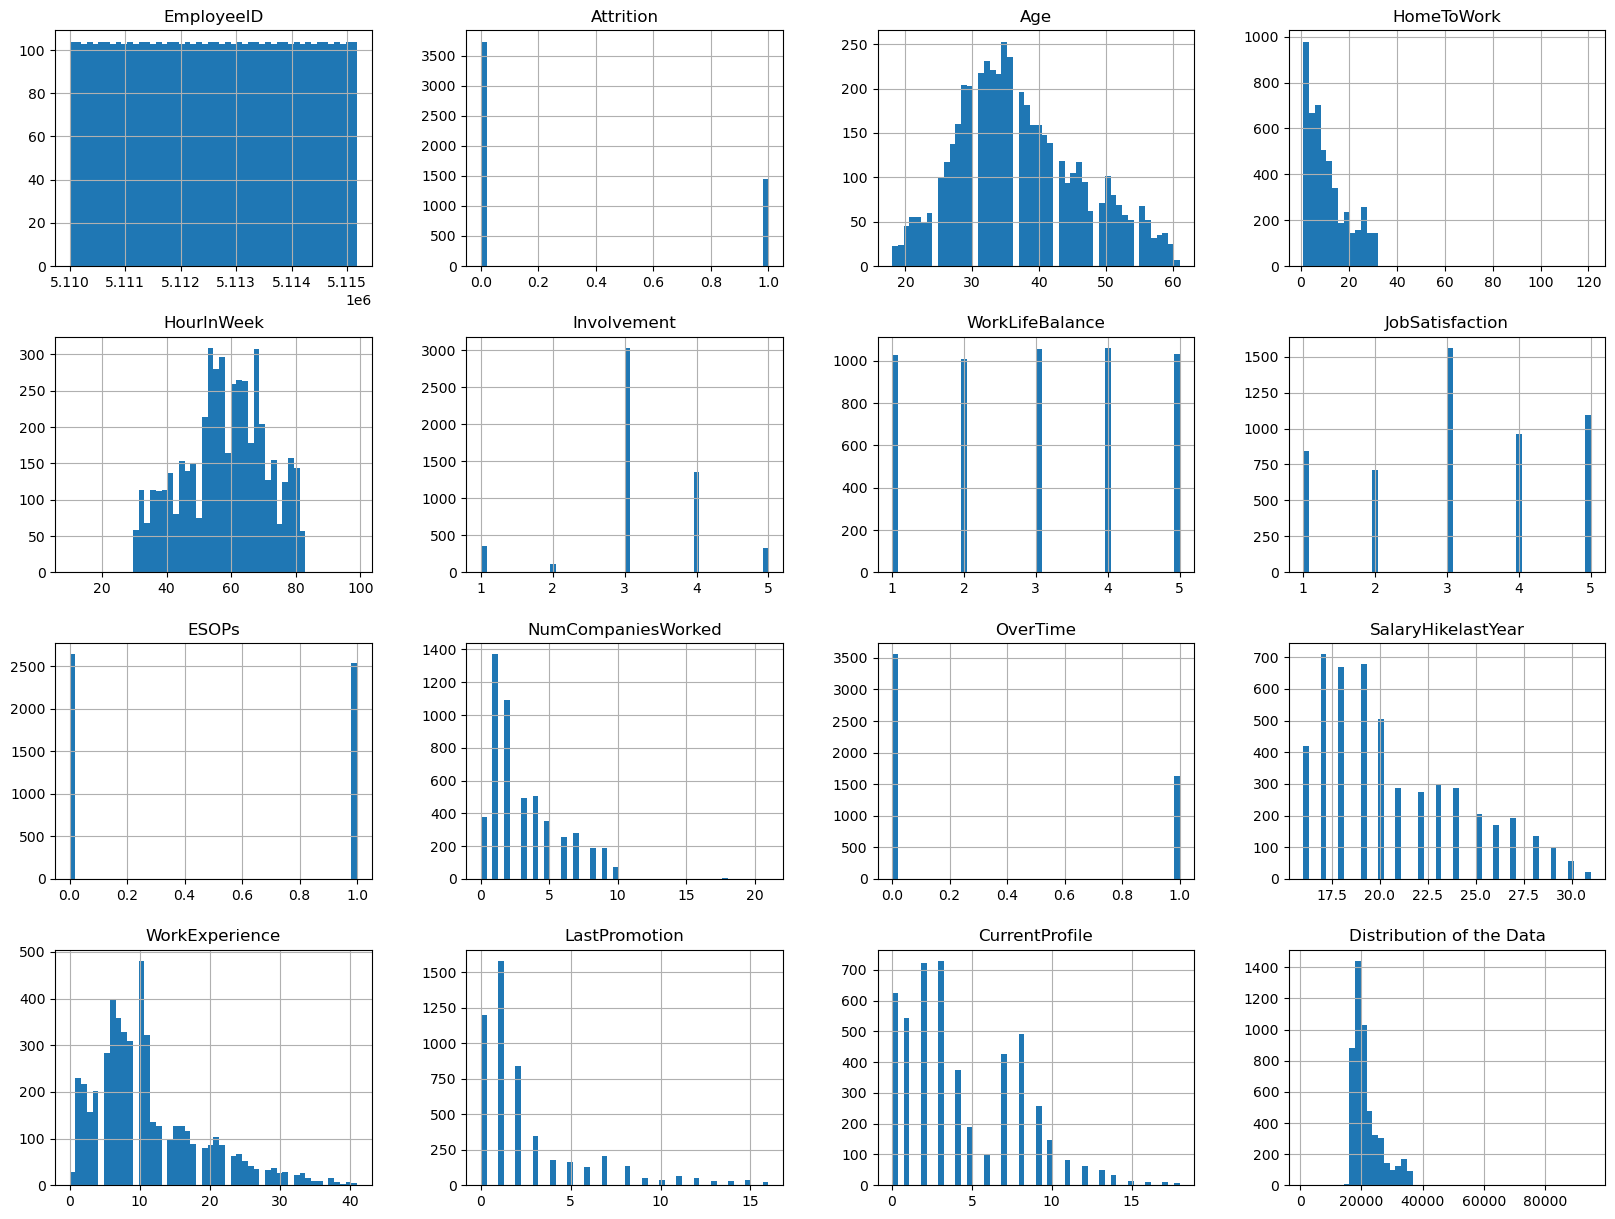

In [10]:
print("\nDistribution of the data:")
print(data.describe(include='all'))

# Show the distribution of the data
plt.figure(figsize=(15, 10))
data.hist(bins=50, figsize=(20, 15))

plt.title("Distribution of the Data")
plt.show()

### Other Charts and graphs

In [11]:
print(data[numeric_cols].columns)

Index(['EmployeeID', 'Age', 'HomeToWork', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'JobSatisfaction', 'NumCompaniesWorked',
       'SalaryHikelastYear', 'WorkExperience', 'LastPromotion',
       'CurrentProfile', 'MonthlyIncome'],
      dtype='object')


<Figure size 2000x1500 with 0 Axes>

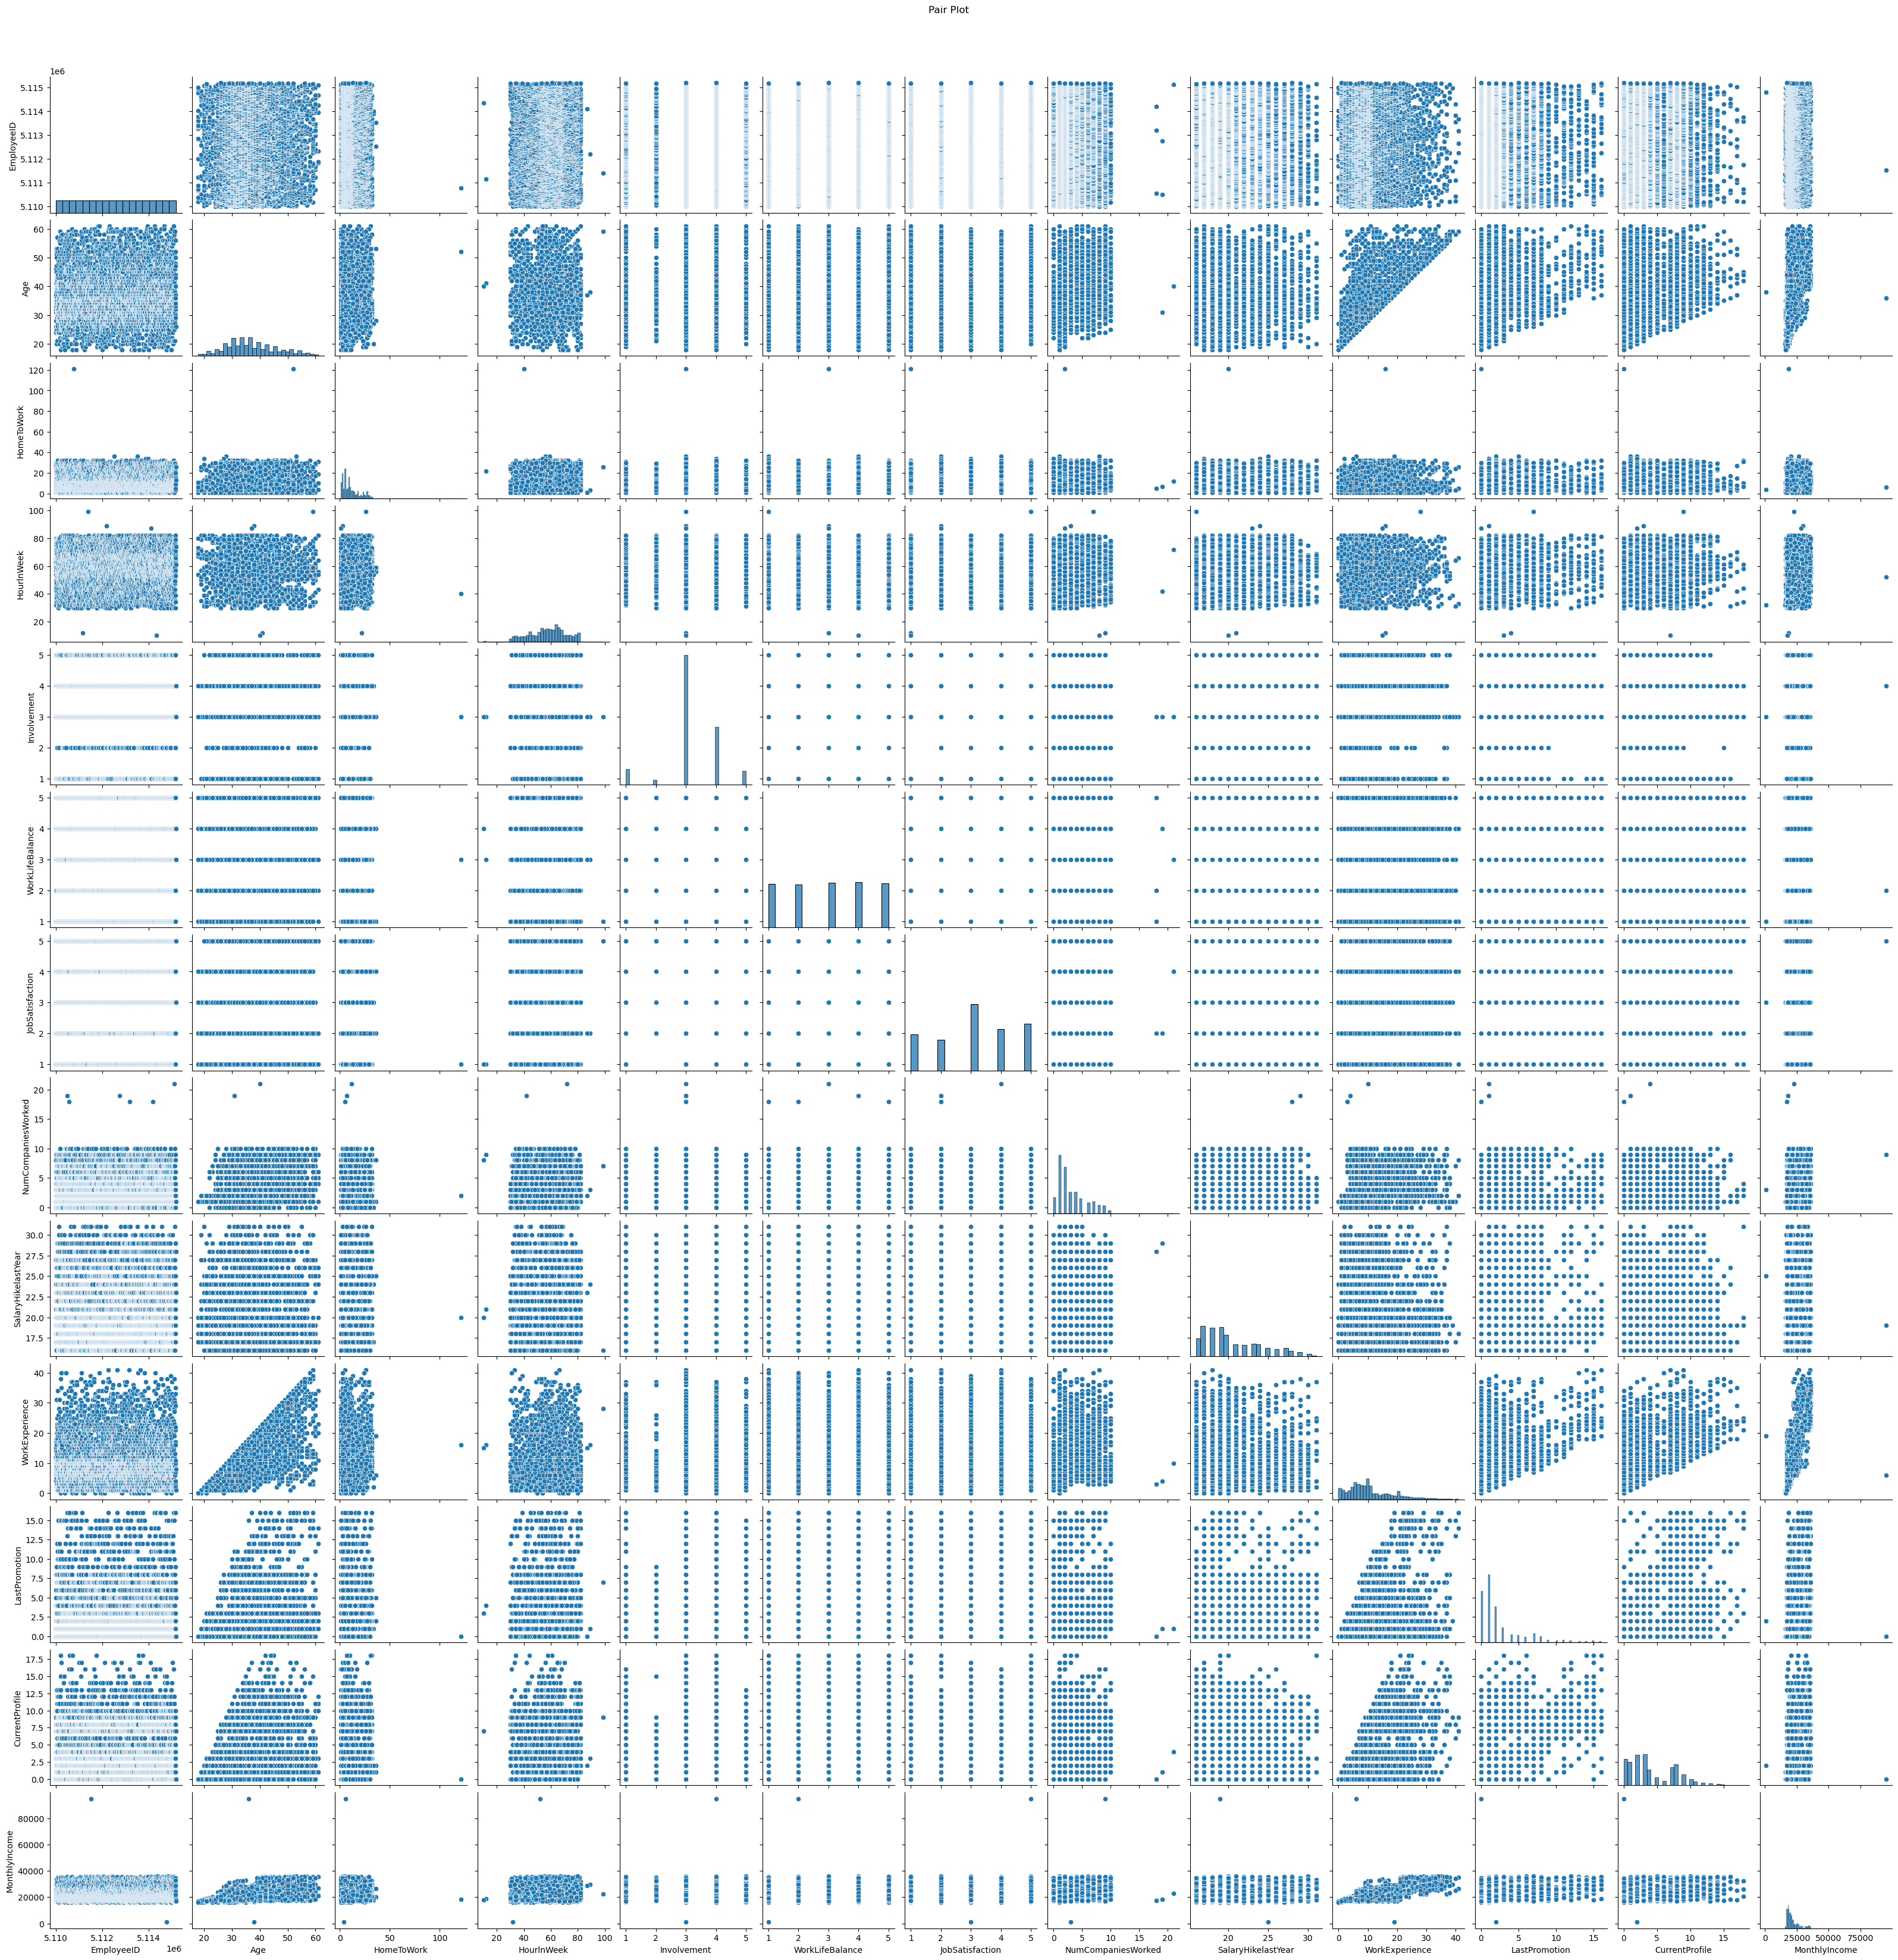

In [12]:
# Show the pair plot of the data
plt.figure(figsize=(20, 15))
sns.pairplot(data=data[numeric_cols])
plt.suptitle("Pair Plot", y=1.02)  # Adjusting the title position
plt.show()

## 3. Data Preprocessing

### Impute missing values

In [13]:
# Identify numeric and binary columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
binary_cols = [col for col in data.columns if data[col].nunique() == 2 and data[col].dtype == 'int64']
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute missing values in numeric columns with the mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Impute missing values in binary columns with the mode
data[binary_cols] = data[binary_cols].fillna(data[binary_cols].mode())

# Impute missing values in categorical columns with the mode
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode())

# Check if there are any missing values left
print("\nNumber of missing values after imputation:")
print(data.isnull().sum().sum())

# Display the first few rows of the dataset after imputation
print(data.head())


Number of missing values after imputation:
208
   EmployeeID  Attrition   Age TravelProfile Department  HomeToWork  \
0     5110001          0  35.0        Rarely  Analytics         5.0   
1     5110002          1  32.0           Yes      Sales         5.0   
2     5110003          0  31.0        Rarely  Analytics         5.0   
3     5110004          0  34.0           Yes      Sales        10.0   
4     5110005          0  37.0            No  Analytics        27.0   

  EducationField  Gender  HourlnWeek  Involvement  ...  JobSatisfaction ESOPs  \
0             CA    Male        69.0            1  ...                1     1   
1     Statistics  Female        62.0            4  ...                2     0   
2     Statistics       F        45.0            5  ...                2     1   
3     Statistics  Female        32.0            3  ...                4     1   
4     Statistics  Female        49.0            3  ...                4     1   

   NumCompaniesWorked  OverTime  Salar

### Outlier treatment

In [14]:
# Remove outliers
data_witout_outlier = data[~outliers_mask.any(axis=1)]

print(f"Number of rows before removing outliers: {data.shape[0]}")
print(f"Number of rows after removing outliers: {data_witout_outlier.shape[0]}")

Number of rows before removing outliers: 5180
Number of rows after removing outliers: 3842


### Encode the 'Department' column

In [15]:
# data = pd.get_dummies(data, columns=['Department'], drop_first=True)
data.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001,0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1,...,1,1,1,1,20.0,7.0,2.0,4.385295,M,18932.0
1,5110002,1,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4,...,2,0,8,0,20.0,4.0,1.0,4.385295,Single,18785.0
2,5110003,0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5,...,2,1,3,0,26.0,12.0,1.0,3.000000,Single,22091.0
3,5110004,0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3,...,4,1,1,0,23.0,5.0,1.0,3.000000,Divorsed,20302.0
4,5110005,0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3,...,4,1,8,0,21.0,12.0,1.0,9.000000,Divorsed,21674.0


## 4. Split the dataset

### Use 'Attrition' as the target column

In [16]:
# Convert Attrition to binary categories if needed
# Assuming Attrition is currently continuous and you want to convert it to 0/1
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x > 0.5 else 0)

# Verify the column has been dropped
print(data.head())

   EmployeeID  Attrition   Age TravelProfile Department  HomeToWork  \
0     5110001          0  35.0        Rarely  Analytics         5.0   
1     5110002          1  32.0           Yes      Sales         5.0   
2     5110003          0  31.0        Rarely  Analytics         5.0   
3     5110004          0  34.0           Yes      Sales        10.0   
4     5110005          0  37.0            No  Analytics        27.0   

  EducationField  Gender  HourlnWeek  Involvement  ...  JobSatisfaction ESOPs  \
0             CA    Male        69.0            1  ...                1     1   
1     Statistics  Female        62.0            4  ...                2     0   
2     Statistics       F        45.0            5  ...                2     1   
3     Statistics  Female        32.0            3  ...                4     1   
4     Statistics  Female        49.0            3  ...                4     1   

   NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0              

In [17]:
print(data.dtypes)

EmployeeID              int64
Attrition               int64
Age                   float64
TravelProfile          object
Department             object
HomeToWork            float64
EducationField         object
Gender                 object
HourlnWeek            float64
Involvement             int64
WorkLifeBalance         int64
Designation            object
JobSatisfaction         int64
ESOPs                   int64
NumCompaniesWorked      int64
OverTime                int64
SalaryHikelastYear    float64
WorkExperience        float64
LastPromotion         float64
CurrentProfile        float64
MaritalStatus          object
MonthlyIncome         float64
dtype: object


In [18]:
data

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001,0,35.000000,Rarely,Analytics,5.000000,CA,Male,69.0,1,...,1,1,1,1,20.0,7.0,2.0,4.385295,M,18932.0
1,5110002,1,32.000000,Yes,Sales,5.000000,Statistics,Female,62.0,4,...,2,0,8,0,20.0,4.0,1.0,4.385295,Single,18785.0
2,5110003,0,31.000000,Rarely,Analytics,5.000000,Statistics,F,45.0,5,...,2,1,3,0,26.0,12.0,1.0,3.000000,Single,22091.0
3,5110004,0,34.000000,Yes,Sales,10.000000,Statistics,Female,32.0,3,...,4,1,1,0,23.0,5.0,1.0,3.000000,Divorsed,20302.0
4,5110005,0,37.000000,No,Analytics,27.000000,Statistics,Female,49.0,3,...,4,1,8,0,21.0,12.0,1.0,9.000000,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,5115176,0,36.000000,Rarely,Analytics,13.000000,CA,F,53.0,3,...,3,0,4,1,22.0,11.0,1.0,5.000000,Single,22142.0
5176,5115177,0,37.108553,Rarely,Marketing,9.000000,CA,Female,66.0,1,...,4,1,9,0,23.0,8.0,0.0,2.000000,Single,17109.0
5177,5115178,0,29.000000,Rarely,Analytics,11.107411,CA,Female,62.0,4,...,1,1,6,0,19.0,8.0,0.0,3.000000,M,17532.0
5178,5115179,0,26.000000,Rarely,Marketing,26.000000,Statistics,Female,61.0,3,...,3,0,1,0,28.0,8.0,5.0,7.000000,Divorsed,17942.0


In [28]:
# Define categorical columns to encode
categorical_columns = ['TravelProfile', 'Department', 'EducationField', 'Gender', 'Designation', 'MaritalStatus']

# Apply one-hot encoding to these columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)  # Set sparse_output=False for dense array
    ],
    remainder='passthrough'  # Keep the rest of the columns (numeric ones) unchanged
)

# Drop the 'Attrition' column from X and extract y
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Apply the transformation
X_transformed = column_transformer.fit_transform(X)

# If you want the new feature names after one-hot encoding
encoded_feature_names = column_transformer.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine the encoded feature names with the remaining numeric feature names
numeric_feature_names = X.columns.difference(categorical_columns)
all_feature_names = list(encoded_feature_names) + list(numeric_feature_names)

# Convert the transformed data back to a DataFrame with the new feature names
X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)

# Apply SMOTE to balance the classes
#smote = SMOTE(random_state=RANDOM_SEED)
#X_resampled, y_resampled = smote.fit_resample(X_transformed_df, y)

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=RANDOM_SEED)

### Ensure there's no data leakage

In [20]:
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"\ny_train distribution:\n{y_train.value_counts()}")
print(f"\ny_test distribution:\n{y_test.value_counts()}")


X_train shape: (4144, 36)
X_test shape: (1036, 36)

y_train distribution:
0    2984
1    1160
Name: Attrition, dtype: int64

y_test distribution:
0    751
1    285
Name: Attrition, dtype: int64


## 5. Model preparation and evaluation

### Helper functions for model evaluation and plotting

In [32]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Good', "Bad"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    test_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test))
    print("Test Accuracy :", test_accuracy)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    return test_accuracy

### Decision Tree

In [33]:
dt_model = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)
dt_test_accuracy = evaluate_model(dt_model)

Train Accuracy : 1.0
Train Confusion Matrix:
[[2984    0]
 [   0 1160]]
--------------------------------------------------
Test Accuracy : 0.9478764478764479
Test Confusion Matrix:
[[709  42]
 [ 12 273]]


In [36]:
# # Get the decision tree graph
#gph = get_dt_graph(dt_model)

# # # Create a PNG file
#Image(gph.create_png())

In [24]:
# Save the PNG file to disk for later viewing
# with open('temp.png', 'wb') as f:
#     f.write(gph.create_png())

### Check best hyperparameters for Decision Tree

In [37]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2, 5, 10, 20, 22, 25],
    'min_samples_leaf': [5, 8, 10, 15, 20, 25, 50, 100],
    'min_samples_split': [5, 8, 10, 15, 20, 25, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)


{'criterion': 'entropy', 'max_depth': 22, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [38]:
dt_model = DecisionTreeClassifier(random_state=RANDOM_SEED, 
                                  max_depth=20, 
                                  criterion='entropy', 
                                  min_samples_split=8, 
                                  min_samples_leaf=5)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)
dt_test_accuracy = evaluate_model(dt_model)

Train Accuracy : 0.9633204633204633
Train Confusion Matrix:
[[2908   76]
 [  76 1084]]
--------------------------------------------------
Test Accuracy : 0.8976833976833977
Test Confusion Matrix:
[[694  57]
 [ 49 236]]


### Random Forest

In [39]:
rdf_model = RandomForestClassifier(random_state=RANDOM_SEED, 
                                  max_depth=16,
                                  n_estimators=162,
                                  n_jobs=-1,
                                 )

                       
rdf_model.fit(X_train, y_train)
y_train_pred_rdf = rdf_model.predict(X_train)
y_test_pred_rdf = rdf_model.predict(X_test)
rdf_test_accuracy = evaluate_model(rdf_model)


Train Accuracy : 1.0
Train Confusion Matrix:
[[2984    0]
 [   0 1160]]
--------------------------------------------------
Test Accuracy : 0.9835907335907336
Test Confusion Matrix:
[[747   4]
 [ 13 272]]


### Naive Bayes

In [40]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_train_pred_nb = nb_model.predict(X_train)
y_test_pred_nb = nb_model.predict(X_test)
nb_test_accuracy = evaluate_model(nb_model)

Train Accuracy : 0.7495173745173745
Train Confusion Matrix:
[[2388  596]
 [ 442  718]]
--------------------------------------------------
Test Accuracy : 0.722972972972973
Test Confusion Matrix:
[[584 167]
 [120 165]]


### Calculate F1 score

In [41]:
f1_train_nb = f1_score(y_train, y_train_pred_nb)
f1_test_nb = f1_score(y_test, y_test_pred_nb)
f1_train_dt = f1_score(y_train, y_train_pred_dt)
f1_test_dt = f1_score(y_test, y_test_pred_dt)
f1_train_rdf = f1_score(y_train, y_train_pred_rdf)
f1_test_rdf = f1_score(y_test, y_test_pred_rdf)

In [42]:
print(f"Naive Bayes - F1 Score (Train): {f1_train_nb}, F1 Score (Test): {f1_test_nb}")
print(f"Decision Tree - F1 Score (Train): {f1_train_dt}, F1 Score (Test): {f1_test_dt}")
print(f"Random forest - F1 Score (Train): {f1_train_rdf}, F1 Score (Test): {f1_test_rdf}")

Naive Bayes - F1 Score (Train): 0.5804365400161682, F1 Score (Test): 0.5348460291734198
Decision Tree - F1 Score (Train): 0.9344827586206896, F1 Score (Test): 0.8166089965397925
Random forest - F1 Score (Train): 1.0, F1 Score (Test): 0.9696969696969697


### Pick up the best model

In [44]:
best_model = 'Naive Bayes' if f1_test_nb > f1_test_rdf else 'Decision Tree' if f1_test_dt > f1_test_rdf  else 'Random forest'
print(f"\nBest model: {best_model}")


Best model: Random forest


In [45]:
if best_model == 'Naive Bayes':
    y_pred_best = y_test_pred_nb
    model = nb_model
elif best_model == 'Random forest':
    y_pred_best = y_test_pred_rdf
    model = rdf_model
else:
    y_pred_best = y_test_pred_dt
    model = dt_model

### Confusion matrix and classification report

In [46]:
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_pred_best, labels=labels)
class_report = classification_report(y_test, y_pred_best, labels=labels, zero_division=1)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[747   4]
 [ 13 272]]


In [47]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       751
           1       0.99      0.95      0.97       285

    accuracy                           0.98      1036
   macro avg       0.98      0.97      0.98      1036
weighted avg       0.98      0.98      0.98      1036



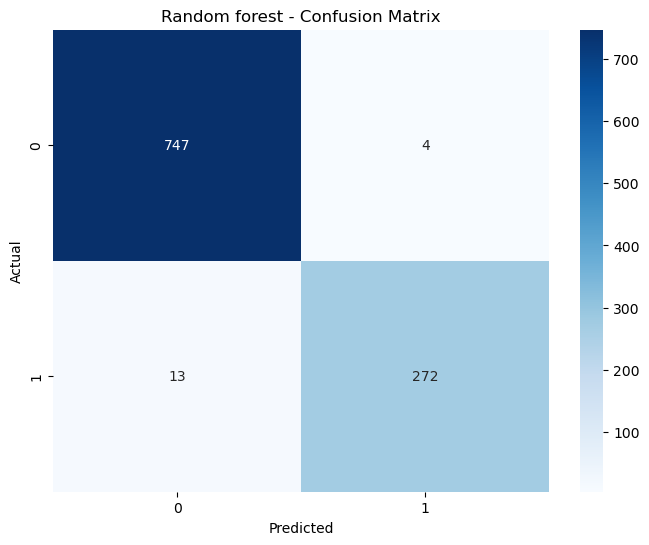

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"{best_model} - Confusion Matrix")
plt.xlabel('Predicted')

plt.ylabel('Actual')
plt.show()

### Summary of the model performance and the best model for the given dataset


Naive Bayes - Evaluation Metrics
Accuracy: 0.722972972972973
Precision: 0.49698795180722893
Recall: 0.5789473684210527
F1 Score: 0.5348460291734198

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       751
           1       0.50      0.58      0.53       285

    accuracy                           0.72      1036
   macro avg       0.66      0.68      0.67      1036
weighted avg       0.74      0.72      0.73      1036



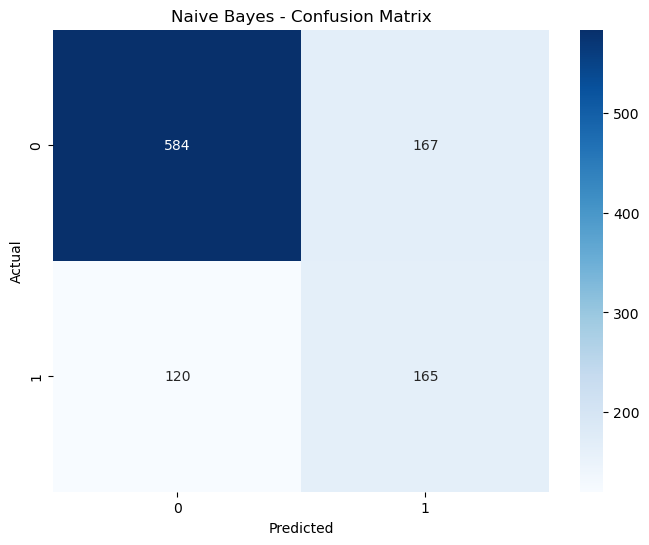


Decision Tree - Evaluation Metrics
Accuracy: 0.8976833976833977
Precision: 0.8054607508532423
Recall: 0.8280701754385965
F1 Score: 0.8166089965397925

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       751
           1       0.81      0.83      0.82       285

    accuracy                           0.90      1036
   macro avg       0.87      0.88      0.87      1036
weighted avg       0.90      0.90      0.90      1036



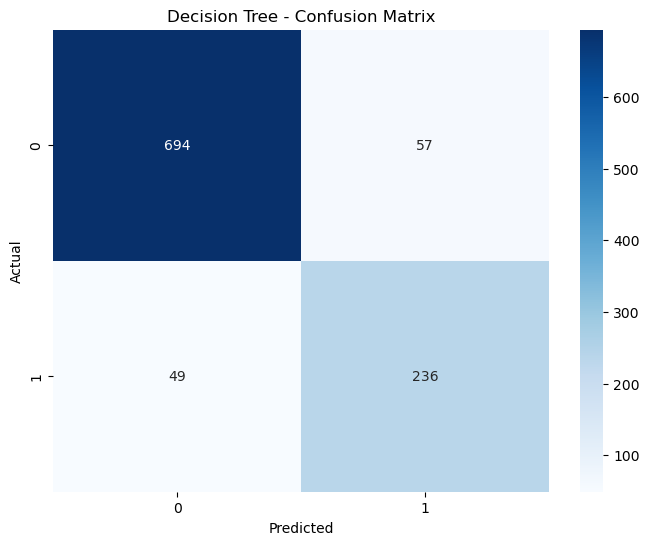


Random Forest - Evaluation Metrics
Accuracy: 0.9835907335907336
Precision: 0.9855072463768116
Recall: 0.9543859649122807
F1 Score: 0.9696969696969697

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       751
           1       0.99      0.95      0.97       285

    accuracy                           0.98      1036
   macro avg       0.98      0.97      0.98      1036
weighted avg       0.98      0.98      0.98      1036



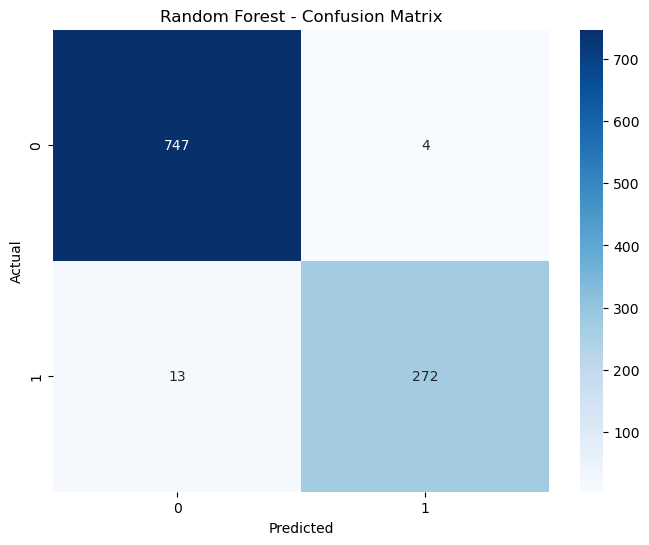


Best model: Random forest


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, classification_report
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    
    print(f"\n{model_name} - Evaluation Metrics")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=1))
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate Naive Bayes model
evaluate_model(y_test, y_test_pred_nb, "Naive Bayes")

# Evaluate Decision Tree model
evaluate_model(y_test, y_test_pred_dt, "Decision Tree")

# Evaluate Random Forest model
evaluate_model(y_test, y_test_pred_rdf, "Random Forest")


# Pick the best model based on F1 score on the test set
f1_test_nb = f1_score(y_test, y_test_pred_nb, zero_division=1)
f1_test_dt = f1_score(y_test, y_test_pred_dt, zero_division=1)
f1_test_rdf = f1_score(y_test, y_test_pred_rdf, zero_division=1)

best_model = 'Naive Bayes' if f1_test_nb > f1_test_rdf else 'Decision Tree' if f1_test_dt > f1_test_rdf  else 'Random forest'
print(f"\nBest model: {best_model}")

if best_model == 'Naive Bayes':
    y_pred_best = y_test_pred_nb
    model = nb_model
elif best_model == 'Random forest':
    y_pred_best = y_test_pred_rdf
    model = rdf_model
else:
    y_pred_best = y_test_pred_dt
    model = dt_model

### Explaination for the evaluation metrics and the classification reports for Naive Bayes, Decision Tree and Random Forest models:

### Accuracy
Accuracy measures the proportion of correctly predicted instances out of the total instances. It is calculated as:

$ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Instances}} $

- **High Accuracy** indicates that the model is performing well overall, but it can be misleading in the case of imbalanced datasets.

### Precision
Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It is calculated as:

$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $

- **High Precision** indicates that the model has a low false positive rate.

### Recall (Sensitivity or True Positive Rate)
Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It is calculated as:

$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $

- **High Recall** indicates that the model has a low false negative rate.

### F1 Score
The F1 score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall and is calculated as:

$ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

- **High F1 Score** indicates that the model performs well in terms of both precision and recall.

---

Certainly! Below is the summary for the Naive Bayes model in the format requested:

---

## Naive Bayes - Evaluation Metrics

### Metrics:
- **Accuracy**: 72.29%
- **Precision**: 49.69%
- **Recall**: 57.89%
- **F1 Score**: 53.48%

### Classification Report:
- **Class 0 (No Employee Attrition)**:
  - Precision: 83%
  - Recall: 78%
  - F1 Score: 80%
  - Support: 751 samples
- **Class 1 (Employee Attrition)**:
  - Precision: 50%
  - Recall: 58%
  - F1 Score: 53%
  - Support: 285 samples

### Explanation:
- **Accuracy** of 72.29% indicates that the Naive Bayes model correctly predicted about 72% of the instances overall.
- **Precision** of 49.69% for class 1 (Employee Attrition) means that when the model predicts a Employee Attrition, it is correct about 50% of the time.
- **Recall** of 57.89% for class 1 indicates that the model correctly identifies about 58% of actual Employee Attrition cases.
- **F1 Score** of 53.48% balances the precision and recall, showing moderate performance in predicting Employee Attrition.
- The **high recall for class 0 (No Employee Attrition)** at 78% suggests that the model is better at identifying non-Employee Attrition cases, but **lower recall for class 1** suggests it misses a significant number of actual Employee Attrition cases.

---

Certainly! Below is the summary for the Decision Tree model in the format requested:

---

## Decision Tree - Evaluation Metrics

### Metrics:
- **Accuracy**: 89.76%
- **Precision**: 80.54%
- **Recall**: 82.80%
- **F1 Score**: 81.66%

### Classification Report:
- **Class 0 (No Employee Attrition)**:
  - Precision: 93%
  - Recall: 92%
  - F1 Score: 93%
  - Support: 751 samples
- **Class 1 (Employee Attrition)**:
  - Precision: 81%
  - Recall: 83%
  - F1 Score: 82%
  - Support: 285 samples

### Explanation:
- **Accuracy** of 89.76% indicates that the Decision Tree model correctly predicted about 90% of the instances overall.
- **Precision** of 80.54% for class 1 (Employee Attrition) means that when the model predicts a Employee Attrition, it is correct about 81% of the time.
- **Recall** of 82.80% for class 1 indicates that the model correctly identifies about 83% of actual Employee Attrition cases.
- **F1 Score** of 81.66% balances the precision and recall, showing good performance in predicting Employee Attrition.
- **High precision and recall for class 0 (No Employee Attrition)** suggest that the model is effective at distinguishing between Employee Attrition and non-Employee Attrition cases. It performs well in correctly identifying true positives and minimizing false negatives and false positives.

---

Certainly! Below is the summary for the Random Forest model in the format requested:

---

## Random Forest - Evaluation Metrics

### Metrics:
- **Accuracy**: 98.35%
- **Precision**: 98.55%
- **Recall**: 95.43%
- **F1 Score**: 96.96%

### Classification Report:
- **Class 0 (No Employee Attrition)**:
  - Precision: 98%
  - Recall: 99%
  - F1 Score: 99%
  - Support: 751 samples
- **Class 1 (Employee Attrition)**:
  - Precision: 99%
  - Recall: 95%
  - F1 Score: 97%
  - Support: 285 samples

### Explanation:
- **Accuracy** of 98.35% indicates that the Random Forest model correctly predicted about 98% of the instances overall.
- **Precision** of 98.55% for class 1 (Employee Attrition) means that when the model predicts a Employee Attrition, it is correct about 99% of the time.
- **Recall** of 95.43% for class 1 indicates that the model correctly identifies about 95% of actual Employee Attrition cases.
- **F1 Score** of 96.96% balances the precision and recall, showing good performance in predicting Employee Attrition.
- **High precision and recall for both class 0 and Class 1** suggest that the model is effective at distinguishing between Employee Attrition and non-Employee Attrition cases. It performs well in correctly identifying true positives and true negatives and minimizing false positives and false negatives.

---

This summary captures the essential metrics and interpretation of the Random Forest performance in predicting Employee Attrition based on the provided dataset.

## Conclusion:
- **Naive Bayes**: The model shows moderate performance with a significant trade-off between precision and recall for Employee Attrition prediction. It is more likely to miss actual employee attrition cases, as indicated by its lower recall.
- **Decision Tree**: The model shows good performance with good accuracy, precision, recall, and F1 scores. It is good at correctly identifying both employee attrition and non-employee attrition cases, making it a good choice for this dataset.
- **Random Forest**: The model shows excellent performance with high accuracy, precision, recall, and F1 scores. It is effective at correctly identifying both employee attrition and non-employee attrition cases, making it a best choice for this dataset.

The Random Forest model significantly outperforms over the Naive Bayes and Decision Tree model, making it the preferred model for predicting employee attrition in this dataset.

---